<a href="https://colab.research.google.com/github/aiswaryapaul/logistic-regression/blob/main/logisctic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is the main difference between linear regression and logistic regression?
* a) Logistic regression predicts continuous values
* b) Logistic regression uses a sigmoid function to predict probabilities
* c) Linear regression is only for classification
* d) Logistic regression is faster

Which of the following is the cost function used in logistic regression?
* a) Mean Squared Error - linear regression
* b) Hinge Loss - support vector machines
* c) Binary Cross-Entropy - logistic regression
* d) Softmax Loss - CNN (AI)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/bank-additional-full_final (3).csv')

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

# Exploratory Data Analysis
1. Null values
2. Duplicates
3. outliers
4. Label Encoding

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
# # less null values or less than 30 percent has null values - drop
# # many null values then we fill the null values with mean median mode
# # fill mean when dealing with continuos values
# # fill median when you are dealing with columns in which are values are in order ascending / descending
# # fill mode when dealing with categorical column

# # continous values and categorical values

# for col in df.columns:
#   if df[col].dtype != 'object':
#     df[col].fillna(df[col].mean,inplace = True)
#   else:
#     df[col].fillna(df[col].mode()[0],inplace = True)


In [ ]:
df.duplicated().sum()

np.int64(1784)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

np.int64(0)

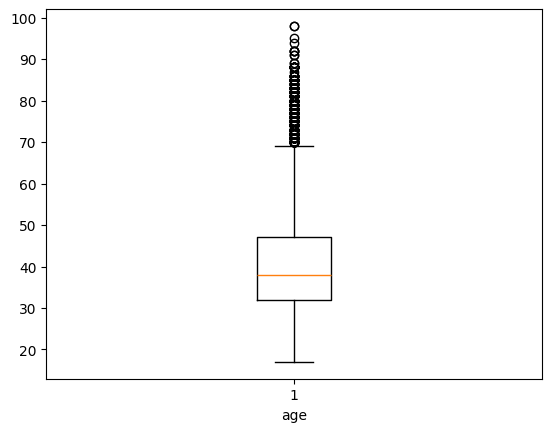

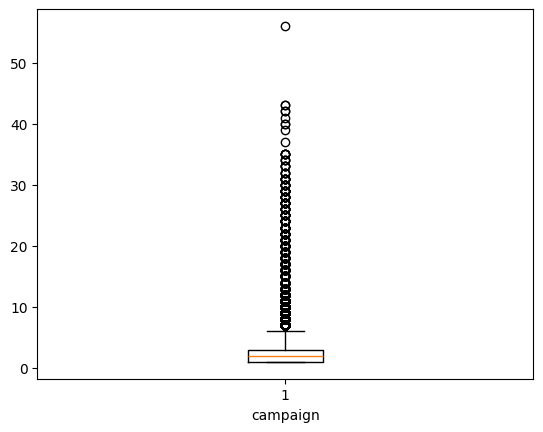

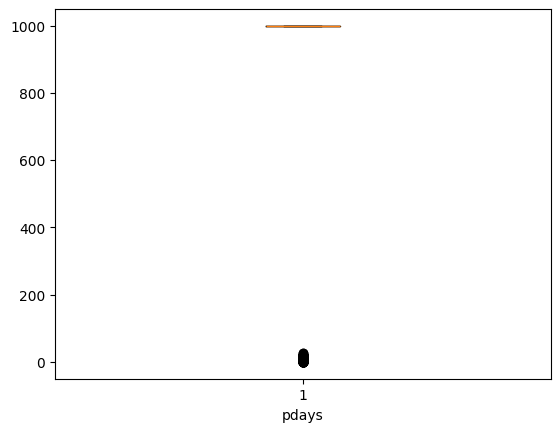

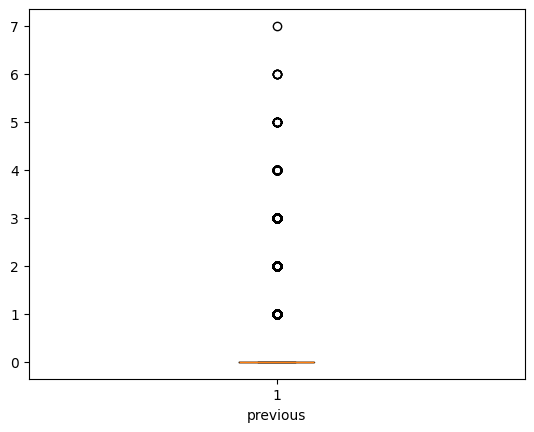

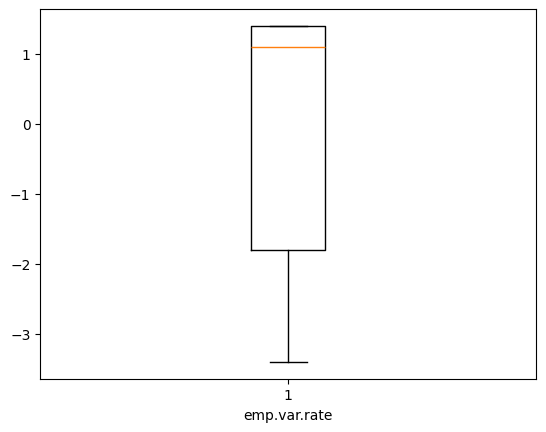

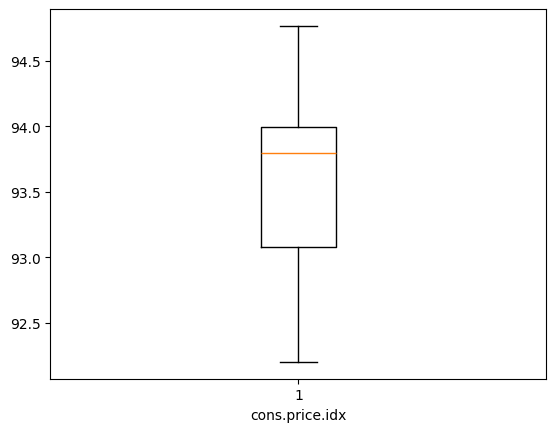

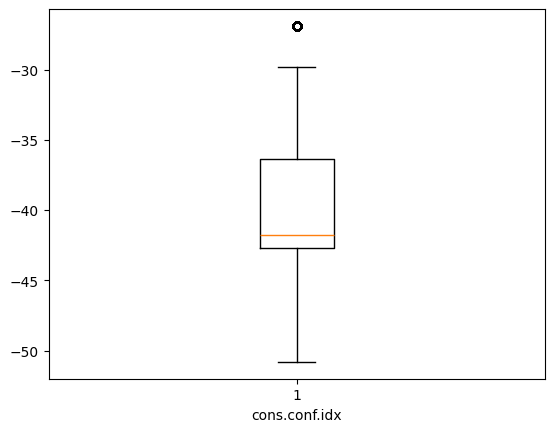

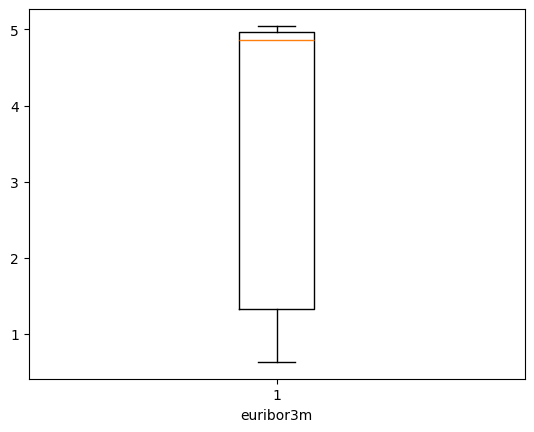

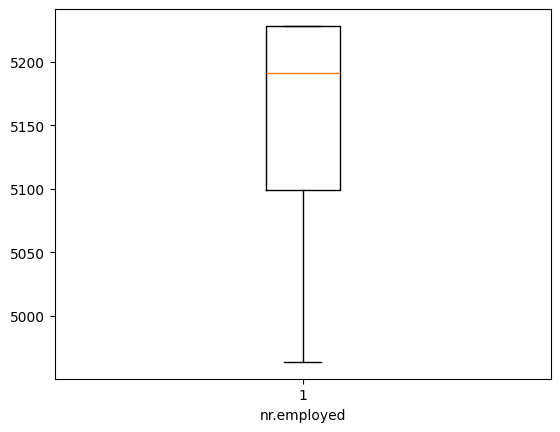

In [ ]:
# outliers

for col in df.columns:
  if df[col].dtype != 'object':
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [ ]:
df['pdays'].value_counts()

,count
pdays,
999,37890
3,438
6,412
4,118
9,64
2,61
7,60
12,58
10,52


In [ ]:
df['previous'].value_counts()

,count
previous,
0,33858
1,4484
2,752
3,216
4,70
5,18
6,5
7,1


In [ ]:
out_col = ['age','campaign','cons.conf.idx']

for col in out_col:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR  = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df = df[(df[col] <= upper_bound) & (df[col] >= lower_bound)]

In [ ]:
df.shape

(36178, 20)

In [ ]:
# label encoding (ordinal categories) - convert each category to a unique integer
# use when : the categories are ordinal (have order) high school , b.tech , m.tech , phd
# one hot encoding (Nominal) - create a binary colums for each category (0/1)
# use when : Nominal (non - ordered ) categories
# ordinal encoding (ordered categorical values) : similar to label encoding but you define the order


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
  if(df[col].dtype == 'object'):
    df[col] = le.fit_transform(df[col])

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,6,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29,10,2,0,0,2,0,0,7,0,1,9,1,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [ ]:
data = pd.DataFrame({'color': ['red','blue','green','green','red']})

one_hot = pd.get_dummies(data , columns = ['color'], drop_first = False)

In [ ]:
one_hot

,color_blue,color_green,color_red
0,False,False,True
1,True,False,False
2,False,True,False
3,False,True,False
4,False,False,True


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

new_data = pd.DataFrame({
    'education':['high school','bachelor','masters','phd']
})


order = [['high school','bachelor','masters','phd']]

encoder = OrdinalEncoder(categories = order)


new_data['education_encoded'] = encoder.fit_transform(new_data[['education']])

print(new_data)

     education  education_encoded
0  high school                0.0
1     bachelor                1.0
2      masters                2.0
3          phd                3.0


In [ ]:
# feature selection
# model building

In [ ]:
correlation_mat = df.corr()

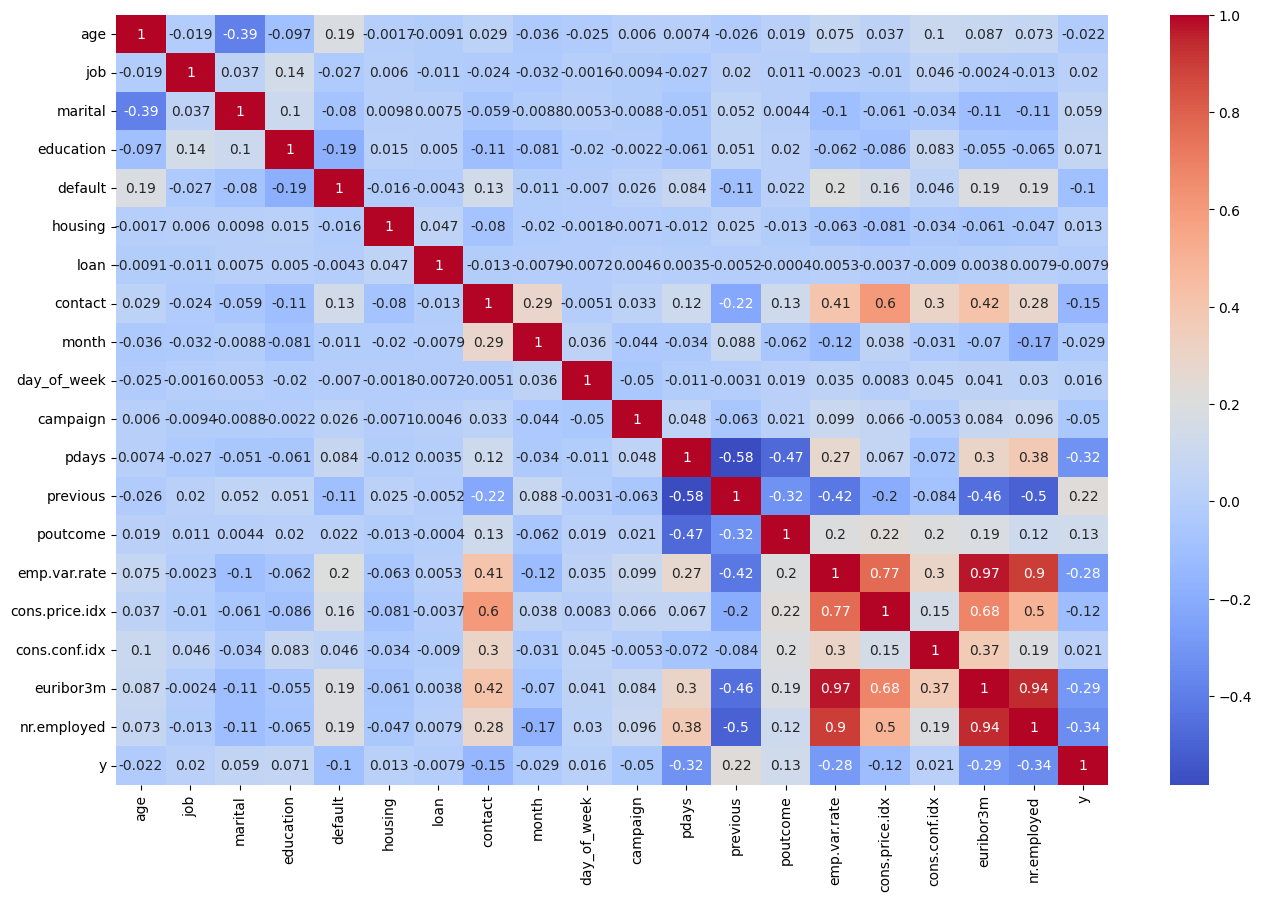

In [ ]:
plt.figure(figsize = (16,10))
sns.heatmap(correlation_mat , annot = True,cmap = 'coolwarm')
plt.show()

# Feature seleaction technique

is the process of choosing the most relevant input variables (features) from your dataset to use in model building

1) better accuracy
2) Faster training -> fewer columns = less data = faster computation
3) easier interpretation
4) reduce overfitting
5) Handles multicollinearity

* Multicollinearity happens when two or more indepenedent(variables) in a regression model are highly correlated. This means that they contain similar information about the variance in the dependent variable

1) Variance Inflation Factor  - detect multicollinearity

x1 - 12.4
x2 - 7.2
x3 - 1.8

the valuesshould lie between the range of 0-6

In [ ]:

# x1 , x2 , x3 independent variables
# y - dependent variable

# Step 1 ) Regress x1 on all other independent variables
# y = mx + c --

# x1 = m2x2 + m3x3 + c
# x2 = m1x1 + m3x3 + c
# x3 = m1x1 + m2x2 + c

# step 2)  Compute the R2 value of the regression

# This will tell how well the other features can predict x1

# high r2 = strong multicolllinearity

# step3 ) plug r2 into the VIF formula

# Vif(x1) = 1 / (1 - r2)


In [ ]:
# VIF - Variance Inflation Factor

x = df.drop('y',axis = 1) # only independent variables
y = df['y'] # dependent variable


In [ ]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,6,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41182,29,10,2,0,0,2,0,0,7,0,1,9,1,2,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
41181,1
41182,0
41184,0
41185,0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_df = pd.DataFrame()

In [ ]:
x.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
vif_df

""


In [ ]:
vif_df['Features'] = x.columns

In [ ]:
vif_df

,Features
0,age
1,job
2,marital
3,education
4,default
5,housing
6,loan
7,contact
8,month
9,day_of_week


In [ ]:
vif_df['Multicollinearity'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [ ]:
vif_df

,Features,Multicollinearity
0,age,21.966070
1,job,2.114551
2,marital,5.649477
3,education,4.533743
4,default,1.413486
5,housing,2.200634
6,loan,1.217609
7,contact,2.935270
8,month,6.604837
9,day_of_week,3.084861


In [ ]:
# VIF = 1 : No multicollinearity
# VIF > 5 : Moderate Multicollinearity
# VIF > 10 Serious Multicollinearity -> consider removing or transforming the feature

In [ ]:
x.drop('nr.employed',axis = 1 , inplace = True)

In [ ]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,6,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028
41182,29,10,2,0,0,2,0,0,7,0,1,9,1,2,-1.1,94.767,-50.8,1.028
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028


In [ ]:
vif_df = pd.DataFrame()
vif_df['Features'] = x.columns
vif_df['Multicollinearity'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [ ]:
vif_df

,Features,Multicollinearity
0,age,21.958629
1,job,2.114409
2,marital,5.648510
3,education,4.531664
4,default,1.410297
5,housing,2.200178
6,loan,1.217517
7,contact,2.468746
8,month,5.711382
9,day_of_week,3.084226


In [ ]:
x.drop('cons.price.idx',axis = 1 , inplace = True)

In [ ]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,euribor3m
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,-36.4,4.857
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,-36.4,4.857
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,-36.4,4.857
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,-36.4,4.857
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,-36.4,4.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,6,0,2,0,0,7,0,1,999,0,1,-1.1,-50.8,1.028
41182,29,10,2,0,0,2,0,0,7,0,1,9,1,2,-1.1,-50.8,1.028
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,-50.8,1.028
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,-50.8,1.028


In [ ]:
vif_df = pd.DataFrame()
vif_df['Features'] = x.columns
vif_df['Multicollinearity'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [ ]:
vif_df

,Features,Multicollinearity
0,age,20.768073
1,job,2.108771
2,marital,5.496358
3,education,4.476751
4,default,1.410286
5,housing,2.198755
6,loan,1.217080
7,contact,2.371250
8,month,5.669544
9,day_of_week,3.066477


In [ ]:
x.drop('pdays',axis = 1 , inplace = True)

In [ ]:
vif_df = pd.DataFrame()
vif_df['Features'] = x.columns
vif_df['Multicollinearity'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [ ]:
vif_df

,Features,Multicollinearity
0,age,19.894134
1,job,2.105691
2,marital,5.379182
3,education,4.426096
4,default,1.410241
5,housing,2.195607
6,loan,1.216909
7,contact,2.301345
8,month,5.625194
9,day_of_week,3.053601


In [ ]:
x.drop('euribor3m',axis = 1 , inplace = True)

In [ ]:
vif_df = pd.DataFrame()
vif_df['Features'] = x.columns
vif_df['Multicollinearity'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [ ]:
vif_df

,Features,Multicollinearity
0,age,16.983749
1,job,2.099141
2,marital,5.187809
3,education,4.277073
4,default,1.409908
5,housing,2.187525
6,loan,1.216483
7,contact,2.289988
8,month,5.248013
9,day_of_week,3.012393


In [ ]:
x.drop('cons.conf.idx',axis = 1 , inplace = True)

In [ ]:
vif_df = pd.DataFrame()
vif_df['Features'] = x.columns
vif_df['Multicollinearity'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [ ]:
vif_df

,Features,Multicollinearity
0,age,10.519901
1,job,2.089816
2,marital,4.300933
3,education,4.177050
4,default,1.409069
5,housing,2.152500
6,loan,1.212707
7,contact,2.268380
8,month,4.850603
9,day_of_week,2.943193


In [ ]:
x.drop('age',axis = 1 , inplace = True)

In [ ]:
vif_df = pd.DataFrame()
vif_df['Features'] = x.columns
vif_df['Multicollinearity'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [ ]:
vif_df

,Features,Multicollinearity
0,job,2.065035
1,marital,4.291795
2,education,3.979094
3,default,1.322478
4,housing,2.097685
5,loan,1.209040
6,contact,2.266805
7,month,4.548502
8,day_of_week,2.842802
9,campaign,3.217133


In [ ]:
x.drop('poutcome',axis =1, inplace = True)

In [ ]:
vif_df = pd.DataFrame()
vif_df['Features'] = x.columns
vif_df['Multicollinearity'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [ ]:
vif_df

,Features,Multicollinearity
0,job,2.042861
1,marital,4.034238
2,education,3.721585
3,default,1.310552
4,housing,2.059338
5,loan,1.206251
6,contact,2.248569
7,month,4.390682
8,day_of_week,2.732719
9,campaign,3.071028


In [ ]:
# vif_values = [] # Empty list to store the vif values

# for i in range(len(x.columns)):
#   vif = variance_inflation_factor(x.values,i)
#   vif_values.append(vif)

# vif_df["Multicollinearity"] = vif_values

In [ ]:
# vif_df = pd.DataFrame()
# vif_df['Features'] = x.columns
# vif_df['Multicollinearity'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [ ]:
# Model Building



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
x_train

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,emp.var.rate
23670,9,2,6,0,0,0,0,1,2,1,0,1.4
4573,7,2,3,0,0,0,1,6,3,3,0,1.1
32902,4,1,2,1,2,0,0,6,1,1,0,-1.8
36064,7,1,3,0,2,0,0,6,3,6,1,-1.8
4488,1,1,2,0,0,0,1,6,3,2,0,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...
19180,0,1,3,0,0,0,0,1,3,4,0,1.4
6800,1,1,2,0,0,0,1,6,4,3,0,1.1
12466,9,1,6,0,2,2,0,3,1,5,0,1.4
885,11,1,3,1,0,0,1,6,4,1,0,1.1


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score(y_test,y_pred)*100

88.2808181315644

In [ ]:
# classification report - confusion matrix
# accuracy score